<a href="https://colab.research.google.com/github/fedelosio99/Nba_Draft_Analysis/blob/main/Datasets_Cleanup_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## needed libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import plotly.express as px
import unicodedata as uc
import time
import requests
from google.colab import drive
import seaborn as sns

### error checking package
import pdb
import re
pd.set_option('display.max_columns', None)

In [ ]:
drive.mount('/content/drive') #in order to work, project folder must be personal or be in direct access to My Drive Folder

Mounted at /content/drive


In [ ]:
_CollegeStats = pd.read_csv('/content/drive/My Drive/Proyecto Final Federico Losio/collegedf.csv',index_col=0)

In [ ]:
_Draft=pd.read_csv('/content/drive/My Drive/Proyecto Final Federico Losio/draftdf.csv',index_col=0)

In [ ]:
_Players=pd.read_csv('/content/drive/My Drive/Proyecto Final Federico Losio/playerdf.csv',index_col=0)

In [ ]:
_CollegeStats.head()

,Player,College_Season,College,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link
0,Joe Barry Carroll,Career,Purdue,123,95.0,7.1,13.0,0.546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.3,0.651,9.3,0.7,0.8,2.8,NaN,2.9,17.7,8.73,joe-barry-carroll-1
1,Darrell Griffith,Career,Louisville,126,NaN,7.8,14.9,0.523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,4.2,0.697,4.6,3.0,NaN,NaN,3.5,2.7,18.5,4.53,darrell-griffith-1
2,Kevin McHale,Career,Minnesota,112,NaN,6.4,11.5,0.553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,3.2,0.773,8.5,1.5,0.4,2.1,NaN,NaN,15.2,8.21,kevin-mchale-1
3,Kelvin Ransey,Career,Ohio State,112,109.0,7.4,15.1,0.490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,3.2,0.780,3.7,4.6,1.5,0.2,2.8,2.9,17.3,7.93,kelvin-ransey-1
4,James Ray,Career,Jacksonville,110,58.0,6.0,10.9,0.546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,3.8,0.679,7.2,NaN,NaN,NaN,NaN,NaN,14.5,-0.74,james-ray-1


In [ ]:
_CollegeStats.isnull().sum()

Player                                          0
College_Season                                138
College                                         0
College_Games_Played                            0
College_Games_Started                         136
College_Field_Goals_Made_Per_Game               0
College_Field_Goals_Attempted_Per_Game          1
College_FG%                                     1
College_2PT_Field_Goals_Made_Per_Game         519
College_2PT_Field_Goals_Attempted_Per_Game    520
College_Minutes_Per_Game                       73
College_2PT_FG%                               317
College_3PT_Field_Goals_Made_Per_Game         519
College_3PT_Field_Goals_Attempted_Per_Game    520
College_3PT_FG%                               466
College_Free_Throws_Made_Per_Game               0
College_Free_Throws_Attempted_Per_Game          1
College_FT%                                     2
Total_Rebounds_pergame                          1
Assists_pergame                                19


In [ ]:
_CollegeStats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1911 entries, 0 to 1910
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Player                                      1911 non-null   object 
 1   College_Season                              1773 non-null   object 
 2   College                                     1911 non-null   object 
 3   College_Games_Played                        1911 non-null   int64  
 4   College_Games_Started                       1775 non-null   float64
 5   College_Field_Goals_Made_Per_Game           1911 non-null   float64
 6   College_Field_Goals_Attempted_Per_Game      1910 non-null   float64
 7   College_FG%                                 1910 non-null   float64
 8   College_2PT_Field_Goals_Made_Per_Game       1392 non-null   float64
 9   College_2PT_Field_Goals_Attempted_Per_Game  1391 non-null   float64
 10  College_Minutes_P

In [ ]:
_Draft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019 entries, 0 to 2018
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pk          2019 non-null   int64  
 1   Tm          2019 non-null   object 
 2   Player      2019 non-null   object 
 3   College     2019 non-null   object 
 4   Yrs         1747 non-null   float64
 5   G           1747 non-null   float64
 6   MP          1747 non-null   float64
 7   PTS         1747 non-null   float64
 8   TRB         1747 non-null   float64
 9   AST         1747 non-null   float64
 10  FG%         1743 non-null   float64
 11  3P%         1602 non-null   float64
 12  FT%         1712 non-null   float64
 13  MP.1        1747 non-null   float64
 14  PTS.1       1747 non-null   float64
 15  TRB.1       1747 non-null   float64
 16  AST.1       1747 non-null   float64
 17  WS          1747 non-null   float64
 18  WS/48       1746 non-null   float64
 19  BPM         1746 non-null   floa

In [ ]:
_CollegeStats['College_Season']=_CollegeStats['College_Season'].fillna(value=_CollegeStats['College'])
# filling college season column values in na with college name

In [ ]:
_CollegeStats[_CollegeStats['College_Season'] != 'Career']
#this happens with players that played in multiple colleges and the scraping data only retreives info of their last college played

,Player,College_Season,College,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link
95,Elvis Rolle,Florida State,Florida State,59,NaN,6.2,10.5,0.590,NaN,NaN,32.2,NaN,NaN,NaN,NaN,3.3,5.7,0.573,8.5,0.6,0.5,1.5,NaN,3.4,15.6,NaN,elvis-rolle-1
100,Mike Ferrara,Colgate,Colgate,78,27.0,8.9,18.6,0.481,NaN,NaN,37.4,NaN,NaN,NaN,NaN,4.7,5.7,0.821,5.5,3.7,NaN,NaN,NaN,1.1,22.6,NaN,mike-ferrara-1
102,Derek Holcomb,Illinois,Illinois,89,54.0,2.6,4.9,0.532,NaN,NaN,23.5,NaN,NaN,NaN,NaN,1.1,1.9,0.591,5.6,1.5,NaN,NaN,1.4,3.1,6.3,NaN,derek-holcomb-1
103,Zam Fredrick,South Carolina,South Carolina,63,62.0,5.4,13.6,0.399,3.4,7.9,33.7,0.424,2.0,5.6,0.363,2.3,3.4,0.675,2.8,2.5,0.9,0.1,2.5,2.3,15.1,NaN,zam-fredrick-1
134,Mark McNamara,California,California,53,NaN,7.8,11.8,0.662,NaN,NaN,35.2,NaN,NaN,NaN,NaN,4.1,7.7,0.524,11.6,0.7,NaN,NaN,NaN,2.8,19.6,NaN,mark-mcnamara-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,Vince Edwards,Western Kentucky,Western Kentucky,53,13.0,0.6,1.5,0.390,0.6,1.5,11.3,0.416,0.0,0.1,0.000,0.2,0.5,0.423,1.0,1.0,0.3,0.1,1.2,0.9,1.4,NaN,vince-edwards-1
1880,Brandon Clarke,Gonzaga,Gonzaga,37,36.0,6.9,10.1,0.687,6.8,9.7,28.1,0.705,0.1,0.4,0.267,2.9,4.2,0.694,8.6,1.9,1.2,3.2,1.5,2.1,16.9,NaN,brandon-clarke-1
1890,Cody Martin,Nevada,Nevada,70,68.0,4.9,9.6,0.511,4.2,7.5,35.1,0.560,0.7,2.1,0.336,2.5,3.5,0.725,5.4,4.8,1.5,1.1,2.0,2.5,13.1,NaN,cody-martin-1
1893,Eric Paschall,Villanova,Villanova,110,82.0,4.0,8.2,0.487,2.9,4.8,29.2,0.591,1.1,3.4,0.338,2.3,3.1,0.756,5.1,1.7,0.7,0.5,1.7,2.4,11.4,NaN,eric-paschall-1


In [ ]:
_CollegeStats.isnull().sum()

Player                                          0
College_Season                                  0
College                                         0
College_Games_Played                            0
College_Games_Started                         136
College_Field_Goals_Made_Per_Game               0
College_Field_Goals_Attempted_Per_Game          1
College_FG%                                     1
College_2PT_Field_Goals_Made_Per_Game         519
College_2PT_Field_Goals_Attempted_Per_Game    520
College_Minutes_Per_Game                       73
College_2PT_FG%                               317
College_3PT_Field_Goals_Made_Per_Game         519
College_3PT_Field_Goals_Attempted_Per_Game    520
College_3PT_FG%                               466
College_Free_Throws_Made_Per_Game               0
College_Free_Throws_Attempted_Per_Game          1
College_FT%                                     2
Total_Rebounds_pergame                          1
Assists_pergame                                19


In [ ]:
_CollegeStats[_CollegeStats['Turnovers_pergame'].isna()]

,Player,College_Season,College,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link
0,Joe Barry Carroll,Career,Purdue,123,95.0,7.1,13.0,0.546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.3,0.651,9.3,0.7,0.8,2.8,NaN,2.9,17.7,8.73,joe-barry-carroll-1
2,Kevin McHale,Career,Minnesota,112,NaN,6.4,11.5,0.553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,3.2,0.773,8.5,1.5,0.4,2.1,NaN,NaN,15.2,8.21,kevin-mchale-1
4,James Ray,Career,Jacksonville,110,58.0,6.0,10.9,0.546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,3.8,0.679,7.2,NaN,NaN,NaN,NaN,NaN,14.5,-0.74,james-ray-1
7,Andrew Toney,Career,Louisiana,107,50.0,9.3,17.6,0.529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.4,0.774,3.2,NaN,NaN,NaN,NaN,3.4,23.6,-2.73,andrew-toney-1
8,Michael Brooks,Career,La Salle,114,NaN,9.3,17.3,0.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,6.3,0.700,12.0,1.7,NaN,NaN,NaN,1.2,23.1,-1.28,michael-brooks-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,Mike Dunleavy,Career,South Carolina,111,NaN,5.5,11.4,0.484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,4.0,0.798,3.1,3.3,NaN,0.1,NaN,2.5,14.3,2.55,mike-dunleavy-1
1313,Bobby Jones,Career,UNC,92,NaN,5.7,9.3,0.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,3.7,0.641,8.9,3.1,NaN,NaN,NaN,2.6,13.7,6.83,bobby-jones-1
1426,Gerald Henderson,Career,VCU,103,NaN,6.6,13.8,0.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,2.8,0.627,3.2,2.5,NaN,NaN,NaN,2.6,15.0,-6.47,gerald-henderson-1
1515,Derrick Williams,Career,Birmingham-Southern,27,27.0,3.2,7.7,0.418,1.3,3.1,NaN,0.400,2.0,4.6,0.431,2.7,3.4,0.813,3.2,3.2,1.3,0.0,NaN,NaN,11.1,-9.79,derrick-williams-1


In [ ]:
_CollegeStats['Team_strength_of_schedule']=_CollegeStats['Team_strength_of_schedule'].fillna(value=_CollegeStats['Team_strength_of_schedule'].mean())
#adding Strength of schedule to all players with the mean of all the values

In [ ]:
null_mask = _CollegeStats.isnull().any(axis=1)
null_rows = _CollegeStats[null_mask]

null_rows

,Player,College_Season,College,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link
0,Joe Barry Carroll,Career,Purdue,123,95.0,7.1,13.0,0.546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.3,0.651,9.3,0.7,0.8,2.8,NaN,2.9,17.7,8.73,joe-barry-carroll-1
1,Darrell Griffith,Career,Louisville,126,NaN,7.8,14.9,0.523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,4.2,0.697,4.6,3.0,NaN,NaN,3.5,2.7,18.5,4.53,darrell-griffith-1
2,Kevin McHale,Career,Minnesota,112,NaN,6.4,11.5,0.553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,3.2,0.773,8.5,1.5,0.4,2.1,NaN,NaN,15.2,8.21,kevin-mchale-1
3,Kelvin Ransey,Career,Ohio State,112,109.0,7.4,15.1,0.490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,3.2,0.780,3.7,4.6,1.5,0.2,2.8,2.9,17.3,7.93,kelvin-ransey-1
4,James Ray,Career,Jacksonville,110,58.0,6.0,10.9,0.546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,3.8,0.679,7.2,NaN,NaN,NaN,NaN,NaN,14.5,-0.74,james-ray-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,Ike Anigbogu,Career,UCLA,29,0.0,2.0,3.5,0.564,2.0,3.5,13.0,0.564,0.0,0.0,NaN,0.8,1.5,0.535,4.0,0.2,0.2,1.2,0.8,2.5,4.7,6.39,ike-anigbogu-1
1842,Robert Williams,Career,Florida Atlantic,122,59.0,2.7,5.6,0.487,2.7,5.6,19.7,0.487,0.0,0.0,NaN,1.2,2.1,0.551,4.7,0.4,0.4,0.6,1.2,2.9,6.6,-5.22,robert-williams-1
1851,Bruce Brown,Career,Hampton,114,75.0,3.7,6.2,0.602,3.7,6.2,20.4,0.602,0.0,0.0,NaN,1.5,3.2,0.470,5.0,0.4,0.2,1.2,1.8,2.3,9.0,-10.69,bruce-brown-1
1870,Jaxson Hayes,Career,Texas,32,21.0,3.8,5.3,0.728,3.8,5.3,23.3,0.728,0.0,0.0,NaN,2.3,3.1,0.740,5.0,0.3,0.6,2.2,0.9,3.3,10.0,11.46,jaxson-hayes-1


In [ ]:
fig = px.histogram(_Draft, x="G",labels={'G':'NBA_Games_Played','y':'count'})
fig.show()

# Merging The 3 Dataframes


1.   _College Stats
2.   _Draft
3.   _Players






In [ ]:
_final_df = _CollegeStats.merge(_Draft, on='Link', how='left').merge(_Players, on='Link', how='left')
# i used a left join in order to just bring information about the players that i could retrive college stats

In [ ]:
_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Player_x                                    1927 non-null   object 
 1   College_Season                              1927 non-null   object 
 2   College_x                                   1927 non-null   object 
 3   College_Games_Played                        1927 non-null   int64  
 4   College_Games_Started                       1786 non-null   float64
 5   College_Field_Goals_Made_Per_Game           1927 non-null   float64
 6   College_Field_Goals_Attempted_Per_Game      1926 non-null   float64
 7   College_FG%                                 1926 non-null   float64
 8   College_2PT_Field_Goals_Made_Per_Game       1399 non-null   float64
 9   College_2PT_Field_Goals_Attempted_Per_Game  1398 non-null   float64
 10  College_Minu

In [ ]:
_final_df[_final_df['colleges'] != _final_df['College_y']]

,Player_x,College_Season,College_x,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link,Pk,Tm,Player_y,College_y,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Draft_Year,Player,year_min,year_max,pos,height,weight,birth_date,colleges
31,David Lawrence,Career,College of Charleston,61,54.0,3.8,9.2,0.411,2.2,4.4,32.0,0.508,1.6,4.8,0.324,1.7,2.6,0.660,6.7,1.7,1.1,0.8,1.8,2.2,10.8,-4.450000,david-lawrence-1,32,POR,David Lawrence,McNeese State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Bruce Collins,Career,Weber State,120,91.0,6.9,14.1,0.486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,4.0,0.774,7.3,1.9,NaN,NaN,NaN,NaN,16.8,-1.060000,bruce-collins-1,33,POR,Bruce Collins,Weber State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Roosevelt Bouie,Career,Syracuse,118,NaN,5.3,9.0,0.593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,3.9,0.646,8.4,0.6,NaN,NaN,NaN,3.2,13.2,0.160000,roosevelt-bouie-1,34,DAL,Roosevelt Bouie,Syracuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Terry Stotts,Career,Oklahoma,91,63.0,5.0,10.2,0.489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2,2.8,0.775,4.5,2.8,1.1,0.2,NaN,2.6,12.1,4.400000,terry-stotts-1,38,HOU,Terry Stotts,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Kimberly Belton,Career,Stanford,107,104.0,5.9,10.3,0.572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,5.8,0.580,9.0,2.0,0.8,0.8,NaN,3.3,15.1,5.060000,kimberly-belton-1,42,PHO,Kimberly Belton,Stanford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,Brandon Clarke,Gonzaga,Gonzaga,37,36.0,6.9,10.1,0.687,6.8,9.7,28.1,0.705,0.1,0.4,0.267,2.9,4.2,0.694,8.6,1.9,1.2,3.2,1.5,2.1,16.9,5.831015,brandon-clarke-1,21,OKC,Brandon Clarke,Gonzaga,5.0,243.0,5185.0,5185.0,1357.0,343.0,0.603,0.286,0.697,21.3,21.3,5.6,1.4,20.2,0.187,2.8,6.2,2019,Brandon Clarke,2020.0,2024.0,F,6-8,215.0,"September 19, 1996","San Jose State, Gonzaga"
1906,Cody Martin,Nevada,Nevada,70,68.0,4.9,9.6,0.511,4.2,7.5,35.1,0.560,0.7,2.1,0.336,2.5,3.5,0.725,5.4,4.8,1.5,1.1,2.0,2.5,13.1,5.831015,cody-martin-1,36,CHO,Cody Martin,Nevada,5.0,206.0,4505.0,4505.0,737.0,475.0,0.442,0.317,0.651,21.9,21.9,3.6,2.3,5.9,0.063,-1.7,0.3,2019,Cody Martin,2020.0,2024.0,G-F,6-5,205.0,"September 28, 1995","NC State, Nevada"
1909,Eric Paschall,Villanova,Villanova,110,82.0,4.0,8.2,0.487,2.9,4.8,29.2,0.591,1.1,3.4,0.338,2.3,3.1,0.756,5.1,1.7,0.7,0.5,1.7,2.4,11.4,5.831015,eric-paschall-1,41,GSW,Eric Paschall,Villanova,3.0,158.0,3086.0,3086.0,509.0,214.0,0.494,0.326,0.758,19.5,19.5,3.2,1.4,5.0,0.078,-2.2,-0.1,2019,Eric Paschall,2020.0,2022.0,F,6-6,255.0,"November 4, 1996","Fordham, Villanova"
1922,Marial Shayok,Iowa State,Iowa State,34,34.0,6.7,13.6,0.496,4.6,8.2,32.9,0.568,2.1,5.4,0.386,3.2,3.6,0.878,4.9,2.0,0.9,0.2,2.7,2.1,18.7,5.831015,marial-shayok-1,54,PHI,Marial Shayok,Iowa State,1.0,4.0,28.0,28.0,7.0,1.0,0.250,0.333,0.750,7.0,7.0,1.8,0.3,-0.1,-0.130,-13.0,-0.1,2019,Marial Shayok,2020.0,2020.0,G,6-5,198.0,"July 26, 1995","Virginia, Iowa State"


In [ ]:
pd.set_option('display.max_rows', None)
a=_final_df.groupby(['College_x', 'College_y']).size()
# some players after the join, have differente college columns of different df

In [ ]:
# checking results
a

College_x                 College_y                               
Alabama                   Alabama                                     19
                          Arizona State                                2
                          Indian Hills Community College               1
Alabama State             Alabama State University                     1
Alcorn State              Alcorn State                                 1
                          Utah State University                        1
American                  American University                          1
Arizona                   Arizona                                     39
Arizona State             Arizona State                               12
Arkansas                  Arkansas                                    17
Arkansas State            Arkansas State University                    1
Auburn                    Auburn                                      10
                          Illinois                       

### Correcting some of the errors of colleges in order for them to be the same name and validate

In [ ]:
_final_df['College_y'] = _final_df['College_y'].str.replace('University of ', '', regex=True)


In [ ]:
_final_df['College_y'] = _final_df['College_y'].str.replace(' University', '', regex=True)
_final_df['College_x'] = _final_df['College_x'].str.replace(' University', '', regex=True)

In [ ]:
_final_df['College_x'] = _final_df['College_x'].str.replace('Bowling Green State', 'Bowling Green', regex=True)


In [ ]:
_final_df['College_x'] = _final_df['College_x'].str.replace(r"Miami (OH)", 'Miami')

In [ ]:
_final_df[_final_df['College_x'] == 'Miami (OH)']


,Player_x,College_Season,College_x,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link,Pk,Tm,Player_y,College_y,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Draft_Year,Player,year_min,year_max,pos,height,weight,birth_date,colleges


In [ ]:
# all the colleges that are differently typed, but are the same and being corrected
CollegeY=['Austin Peay State','Central Connecticut State','UNC Charlotte','Dartmouth College','Iona College','Missouri-Kansas City','Long Island','Cal State Long Beach','Loyola Chicago','Manhattan College','Marist College','United States Naval Academy','the Pacific','Saint Francis','Southern and A&M College',"St. John's","Saint Joseph's",'Tennessee Technological','California, Irvine','Central Florida','UC Santa Barbara','Illinois at Chicago','Tennessee at Martin','Texas-El Paso']
CollegeYCorrected= ['Austin Peay','Central Connecticut','Charlotte','Dartmouth','Iona','Kansas City','LIU','Long Beach State','Loyola (IL)','Manhattan','Marist','Navy','Pacific','Saint Francis (PA)','Southern',"St. John's (NY)","St. Joseph's",'Tennessee Tech','UC-Irvine','UCF','UCSB','UIC','UT-Martin','UTEP']

In [ ]:
for i in range(len(CollegeY)):

    _final_df['College_y'] = _final_df['College_y'].str.replace(CollegeY[i],CollegeYCorrected[i],regex=True)


In [ ]:
pd.set_option('display.max_rows', 20)
_final_df[_final_df['College_x'] != _final_df['College_y']]

# all of these are players that in the join brought the wrong information so are not useful for analisis
# some players have the same name and in the sports reference page their player link is name-surname-2 instead of 1

,Player_x,College_Season,College_x,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link,Pk,Tm,Player_y,College_y,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Draft_Year,Player,year_min,year_max,pos,height,weight,birth_date,colleges
31,David Lawrence,Career,College of Charleston,61,54.0,3.8,9.2,0.411,2.2,4.4,32.0,0.508,1.6,4.8,0.324,1.7,2.6,0.660,6.7,1.7,1.1,0.8,1.8,2.2,10.8,-4.450000,david-lawrence-1,32,POR,David Lawrence,McNeese State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Billy Williams,Career,Binghamton,81,49.0,1.4,3.6,0.403,0.8,1.8,21.6,0.432,0.6,1.7,0.371,0.6,1.2,0.515,2.9,1.7,1.0,0.0,1.8,2.1,4.1,-4.670000,billy-williams-1,43,HOU,Billy Williams,Clemson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Mike Harper,Career,Butler,105,33.0,0.6,1.4,0.448,NaN,NaN,12.1,0.490,NaN,NaN,NaN,0.3,0.5,0.554,1.5,0.6,0.2,0.1,0.9,2.0,1.5,-0.800000,mike-harper-1,56,POR,Mike Harper,North Park,2.0,123.0,1894.0,1894.0,432.0,71.0,0.474,0.000,0.559,15.4,15.4,3.5,0.6,2.4,0.062,-2.4,-0.2,1980,Mike Harper,1981.0,1982.0,C-F,6-10,195.0,"December 9, 1957",North Park University
55,John Campbell,Career,Bucknell,22,0.0,0.7,1.3,0.517,NaN,NaN,3.5,NaN,NaN,NaN,NaN,0.4,1.1,0.320,1.0,0.3,0.1,0.1,NaN,0.3,1.7,-9.350000,john-campbell-1,59,PHO,John Campbell,Clemson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Steve Johnson,Career,Duke,21,0.0,0.1,0.2,0.500,0.1,0.2,1.9,0.500,0.0,0.0,NaN,0.1,0.2,0.600,0.2,0.0,0.1,0.0,0.0,0.1,0.3,9.590000,steve-johnson-1,7,KCK,Steve Johnson,Oregon State,10.0,626.0,13618.0,13618.0,3450.0,777.0,0.572,0.000,0.634,21.8,21.8,5.5,1.2,26.9,0.095,-1.7,1.1,1981,Steve Johnson,1982.0,1991.0,C-F,6-10,235.0,"November 3, 1957",Oregon State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,Robert Williams,Career,Florida Atlantic,122,59.0,2.7,5.6,0.487,2.7,5.6,19.7,0.487,0.0,0.0,NaN,1.2,2.1,0.551,4.7,0.4,0.4,0.6,1.2,2.9,6.6,-5.220000,robert-williams-1,27,BOS,Robert Williams,Texas A&M,6.0,215.0,4403.0,4403.0,1485.0,304.0,0.729,0.000,0.660,20.5,20.5,6.9,1.4,22.6,0.246,4.8,7.5,2018,Robert Williams,2019.0,2024.0,C-F,6-9,237.0,"October 17, 1997",Texas A&M
1866,Bruce Brown,Career,Hampton,114,75.0,3.7,6.2,0.602,3.7,6.2,20.4,0.602,0.0,0.0,NaN,1.5,3.2,0.470,5.0,0.4,0.2,1.2,1.8,2.3,9.0,-10.690000,bruce-brown-1,42,DET,Bruce Brown,Miami (FL),6.0,416.0,10454.0,10454.0,1765.0,1033.0,0.481,0.337,0.764,25.1,25.1,4.2,2.5,19.3,0.088,-1.3,1.9,2018,Bruce Brown,2019.0,2024.0,G-F,6-4,202.0,"August 15, 1996",Miami (FL)
1873,Vince Edwards,Western Kentucky,Western Kentucky,53,13.0,0.6,1.5,0.390,0.6,1.5,11.3,0.416,0.0,0.1,0.000,0.2,0.5,0.423,1.0,1.0,0.3,0.1,1.2,0.9,1.4,5.831015,vince-edwards-1,52,UTA,Vince Edwards,Purdue,1.0,2.0,16.0,16.0,2.0,0.0,0.250,0.250,NaN,8.0,8.0,1.0,0.0,0.0,-0.014,-6.4,0.0,2018,Vince Edwards,2019.0,2019.0,F,6-8,225.0,"April 5, 1996",Purdue
1889,Cameron Johnson,Career,Texas State,118,79.0,3.7,8.0,0.464,3.7,8.0,19.9,0.465,0.0,0.0,0.333,2.6,4.3,0.611,5.4,0.7,0.9,0.5,2.0,3.2,10.1,-4.620000,cameron-johnson-1,11,MIN,Cameron Johnson,UNC,5.0,283.0,7220.0,7220.0,1095.0,470.0,0.447,0.392,0.830,25.5,25.5,3.9,1.7,17.7,0.118,1.2,5.9,2019,Cameron Joh

In [ ]:
_final_df[_final_df['Player_x'] != _final_df['Player_y']]

,Player_x,College_Season,College_x,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link,Pk,Tm,Player_y,College_y,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Draft_Year,Player,year_min,year_max,pos,height,weight,birth_date,colleges


In [ ]:
pd.set_option('display.max_rows', 20)
_final_df[_final_df['birth_date'].isnull()]

,Player_x,College_Season,College_x,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link,Pk,Tm,Player_y,College_y,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Draft_Year,Player,year_min,year_max,pos,height,weight,birth_date,colleges
31,David Lawrence,Career,College of Charleston,61,54.0,3.8,9.2,0.411,2.2,4.4,32.0,0.508,1.6,4.8,0.324,1.7,2.6,0.660,6.7,1.7,1.1,0.8,1.8,2.2,10.8,-4.45,david-lawrence-1,32,POR,David Lawrence,McNeese State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Bruce Collins,Career,Weber State,120,91.0,6.9,14.1,0.486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,4.0,0.774,7.3,1.9,NaN,NaN,NaN,NaN,16.8,-1.06,bruce-collins-1,33,POR,Bruce Collins,Weber State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Roosevelt Bouie,Career,Syracuse,118,NaN,5.3,9.0,0.593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,3.9,0.646,8.4,0.6,NaN,NaN,NaN,3.2,13.2,0.16,roosevelt-bouie-1,34,DAL,Roosevelt Bouie,Syracuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Terry Stotts,Career,Oklahoma,91,63.0,5.0,10.2,0.489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2,2.8,0.775,4.5,2.8,1.1,0.2,NaN,2.6,12.1,4.40,terry-stotts-1,38,HOU,Terry Stotts,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Kimberly Belton,Career,Stanford,107,104.0,5.9,10.3,0.572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,5.8,0.580,9.0,2.0,0.8,0.8,NaN,3.3,15.1,5.06,kimberly-belton-1,42,PHO,Kimberly Belton,Stanford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,Cady Lalanne,Career,UMass,111,80.0,3.8,6.9,0.553,3.7,6.5,25.2,0.575,0.1,0.4,0.213,2.2,3.4,0.666,7.9,0.2,0.4,1.8,1.9,2.5,10.0,4.56,cady-lalanne-1,55,SAS,Cady Lalanne,UMass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,J.P. Tokoto,Career,UNC,107,67.0,2.7,5.8,0.462,2.5,5.0,22.3,0.491,0.2,0.7,0.266,1.2,2.3,0.544,4.4,2.7,1.2,0.3,1.7,2.0,6.7,9.41,jp-tokoto-1,58,PHI,J.P. Tokoto,UNC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1793,Isaiah Cousins,Career,Oklahoma,137,119.0,3.5,8.5,0.408,2.2,5.3,27.7,0.408,1.3,3.2,0.407,1.5,2.1,0.711,3.9,2.7,1.1,0.3,1.9,2.0,9.7,9.28,isaiah-cousins-1,59,SAC,Isaiah Cousins,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872,Tony Carr,Career,Penn State,70,70.0,5.5,13.9,0.396,3.8,9.5,34.2,0.397,1.7,4.4,0.395,3.8,4.9,0.786,4.9,4.6,0.7,0.3,2.4,2.0,16.6,8.35,tony-carr-1,51,NOP,Tony Carr,Penn State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_mask = _final_df.isnull().any(axis=1)
null_rows = _final_df[null_mask]
pd.set_option('display.max_rows', 20)
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877 entries, 0 to 1925
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Player_x                                    877 non-null    object 
 1   College_Season                              877 non-null    object 
 2   College_x                                   877 non-null    object 
 3   College_Games_Played                        877 non-null    int64  
 4   College_Games_Started                       736 non-null    float64
 5   College_Field_Goals_Made_Per_Game           877 non-null    float64
 6   College_Field_Goals_Attempted_Per_Game      876 non-null    float64
 7   College_FG%                                 876 non-null    float64
 8   College_2PT_Field_Goals_Made_Per_Game       349 non-null    float64
 9   College_2PT_Field_Goals_Attempted_Per_Game  348 non-null    float64
 10  College_Minutes_Pe

In [ ]:
_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Player_x                                    1927 non-null   object 
 1   College_Season                              1927 non-null   object 
 2   College_x                                   1927 non-null   object 
 3   College_Games_Played                        1927 non-null   int64  
 4   College_Games_Started                       1786 non-null   float64
 5   College_Field_Goals_Made_Per_Game           1927 non-null   float64
 6   College_Field_Goals_Attempted_Per_Game      1926 non-null   float64
 7   College_FG%                                 1926 non-null   float64
 8   College_2PT_Field_Goals_Made_Per_Game       1399 non-null   float64
 9   College_2PT_Field_Goals_Attempted_Per_Game  1398 non-null   float64
 10  College_Minu

In [ ]:
Column_floats=['College_Games_Started','College_2PT_Field_Goals_Made_Per_Game','College_2PT_Field_Goals_Attempted_Per_Game','College_3PT_Field_Goals_Made_Per_Game','College_3PT_Field_Goals_Attempted_Per_Game','Turnovers_pergame','Fouls_pergame','height']
Column_perc = ['College_2PT_FG%','College_3PT_FG%']
Columns_date=['birth_date']

In [ ]:
Column_floats=['College_Games_Started','College_2PT_Field_Goals_Made_Per_Game','College_2PT_Field_Goals_Attempted_Per_Game','College_3PT_Field_Goals_Made_Per_Game','College_3PT_Field_Goals_Attempted_Per_Game','Turnovers_pergame','Fouls_pergame']
Column_perc = ['College_2PT_FG%','College_3PT_FG%']
Columns_date=['birth_date']

def convert_height(height_str):
  """
  Converts a height string in feet and inches to a float representing the height in inches.

  Args:
    height_str: A string representing the height in feet and inches (e.g., '7-0').

  Returns:
    A float representing the height in inches."""

  if isinstance(height_str, str):
      feet, inches = height_str.split('-')
      return float(feet) * 12 + float(inches)
  else:
      return height_str

for column in Column_floats:
  _final_df[column] = _final_df[column].astype(np.float64)

#_final_df['height'] = _final_df['height'].apply(convert_height)
#_final_df['height'] = _final_df['height'].astype(np.float64)



for column in Columns_date:
  _final_df[column] = _final_df[column].astype('datetime64[ns]')

In [ ]:
_final_df

,Player_x,College_Season,College_x,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link,Pk,Tm,Player_y,College_y,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Draft_Year,Player,year_min,year_max,pos,height,weight,birth_date,colleges
0,Joe Barry Carroll,Career,Purdue,123,95.0,7.1,13.0,0.546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.3,0.651,9.3,0.7,0.8,2.8,NaN,2.9,17.7,8.730000,joe-barry-carroll-1,1,GSW,Joe Barry Carroll,Purdue,10.0,705.0,22838.0,22838.0,5404.0,1264.0,0.474,0.000,0.747,32.4,32.4,7.7,1.8,35.6,0.075,-0.6,8.2,1980,Joe Barry Carroll,1981.0,1991.0,C-F,7-0,225.0,1958-07-24,Purdue
1,Darrell Griffith,Career,Louisville,126,NaN,7.8,14.9,0.523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,4.2,0.697,4.6,3.0,NaN,NaN,3.5,2.7,18.5,4.530000,darrell-griffith-1,2,UTA,Darrell Griffith,Louisville,10.0,765.0,21403.0,21403.0,2519.0,1627.0,0.463,0.332,0.707,28.0,28.0,3.3,2.1,22.0,0.049,-1.4,3.4,1980,Darrell Griffith,1981.0,1991.0,G,6-4,190.0,1958-06-16,Louisville
2,Kevin McHale,Career,Minnesota,112,NaN,6.4,11.5,0.553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,3.2,0.773,8.5,1.5,0.4,2.1,NaN,NaN,15.2,8.210000,kevin-mchale-1,3,BOS,Kevin McHale,Minnesota,13.0,971.0,30118.0,30118.0,7122.0,1670.0,0.554,0.261,0.798,31.0,31.0,7.3,1.7,113.0,0.180,2.5,34.3,1980,Kevin McHale,1981.0,1993.0,F-C,6-10,210.0,1957-12-19,Minnesota
3,Kelvin Ransey,Career,Ohio State,112,109.0,7.4,15.1,0.490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,3.2,0.780,3.7,4.6,1.5,0.2,2.8,2.9,17.3,7.930000,kelvin-ransey-1,4,CHI,Kelvin Ransey,Ohio State,6.0,474.0,11586.0,11586.0,901.0,2480.0,0.454,0.132,0.782,24.4,24.4,1.9,5.2,17.9,0.074,-0.9,3.3,1980,Kelvin Ransey,1981.0,1986.0,G,6-1,170.0,1958-05-03,Ohio State
4,James Ray,Career,Jacksonville,110,58.0,6.0,10.9,0.546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,3.8,0.679,7.2,NaN,NaN,NaN,NaN,NaN,14.5,-0.740000,james-ray-1,5,DEN,James Ray,Jacksonville,3.0,103.0,843.0,843.0,228.0,76.0,0.428,0.333,0.629,8.2,8.2,2.2,0.7,-0.3,-0.017,-4.5,-0.6,1980,James Ray,1981.0,1983.0,F,6-8,215.0,1957-07-27,Jacksonville University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,Marial Shayok,Iowa State,Iowa State,34,34.0,6.7,13.6,0.496,4.6,8.2,32.9,0.568,2.1,5.4,0.386,3.2,3.6,0.878,4.9,2.0,0.9,0.2,2.7,2.1,18.7,5.831015,marial-shayok-1,54,PHI,Marial Shayok,Iowa State,1.0,4.0,28.0,28.0,7.0,1.0,0.250,0.333,0.750,7.0,7.0,1.8,0.3,-0.1,-0.130,-13.0,-0.1,2019,Marial Shayok,2020.0,2020.0,G,6-5,198.0,1995-07-26,"Virginia, Iowa State"
1923,Kyle Guy,Career,Virginia,106,78.0,4.4,10.1,0.433,2.0,4.5,29.1,0.444,2.4,5.6,0.425,1.3,1.6,0.806,3.0,1.6,0.7,0.0,1.1,1.1,12.5,10.040000,kyle-guy-1,55,NYK,Kyle Guy,Virginia,3.0,53.0,431.0,431.0,53.0,50.0,0.361,0.303,0.750,8.1,8.1,1.0,0.9,0.1,0.006,-4.9,-0.3,2019,Kyle Guy,2020.0,2022.0,G,6-1,167.0,1997-08-11,Virginia
1924,Jaylen Hands,Career,UCLA,64,48.0,4.1,9.9,0.409,2.4,5.4,28.3,0.440,1.7,4.6,0.373,2.3,3.0,0.762,3.8,4.4,1.2,0.2,2.5,1.4,12.1,6.820000,jaylen-hands-1,56,LAC,Jaylen Hands,UCLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1925,Jordan Bone,Career,Tennessee,95,87.0,3.6,8.4,0.424,2.6,5.7,26.1,0.458,1.0,2.7,0.353,1.6,2.0,0.817,2.4,4.3,0.7,0.1,1.6,1.2,9.7,10.150000,jordan-bone-1,57,NOP,Jordan Bone,Tennessee,2.0,24.0,249.0,249.0,28.0,26.0,0.378,0.286,NaN,10.4,10.4,1.2,1.1,0.1,0.010,-5.9,-0.2

In [ ]:
_final_df[_final_df['G'].isna()]

,Player_x,College_Season,College_x,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link,Pk,Tm,Player_y,College_y,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Draft_Year,Player,year_min,year_max,pos,height,weight,birth_date,colleges
31,David Lawrence,Career,College of Charleston,61,54.0,3.8,9.2,0.411,2.2,4.4,32.0,0.508,1.6,4.8,0.324,1.7,2.6,0.660,6.7,1.7,1.1,0.8,1.8,2.2,10.8,-4.45,david-lawrence-1,32,POR,David Lawrence,McNeese State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
32,Bruce Collins,Career,Weber State,120,91.0,6.9,14.1,0.486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,4.0,0.774,7.3,1.9,NaN,NaN,NaN,NaN,16.8,-1.06,bruce-collins-1,33,POR,Bruce Collins,Weber State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
33,Roosevelt Bouie,Career,Syracuse,118,NaN,5.3,9.0,0.593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,3.9,0.646,8.4,0.6,NaN,NaN,NaN,3.2,13.2,0.16,roosevelt-bouie-1,34,DAL,Roosevelt Bouie,Syracuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
36,Terry Stotts,Career,Oklahoma,91,63.0,5.0,10.2,0.489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2,2.8,0.775,4.5,2.8,1.1,0.2,NaN,2.6,12.1,4.40,terry-stotts-1,38,HOU,Terry Stotts,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
40,Kimberly Belton,Career,Stanford,107,104.0,5.9,10.3,0.572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,5.8,0.580,9.0,2.0,0.8,0.8,NaN,3.3,15.1,5.06,kimberly-belton-1,42,PHO,Kimberly Belton,Stanford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,Cady Lalanne,Career,UMass,111,80.0,3.8,6.9,0.553,3.7,6.5,25.2,0.575,0.1,0.4,0.213,2.2,3.4,0.666,7.9,0.2,0.4,1.8,1.9,2.5,10.0,4.56,cady-lalanne-1,55,SAS,Cady Lalanne,UMass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1752,J.P. Tokoto,Career,UNC,107,67.0,2.7,5.8,0.462,2.5,5.0,22.3,0.491,0.2,0.7,0.266,1.2,2.3,0.544,4.4,2.7,1.2,0.3,1.7,2.0,6.7,9.41,jp-tokoto-1,58,PHI,J.P. Tokoto,UNC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1793,Isaiah Cousins,Career,Oklahoma,137,119.0,3.5,8.5,0.408,2.2,5.3,27.7,0.408,1.3,3.2,0.407,1.5,2.1,0.711,3.9,2.7,1.1,0.3,1.9,2.0,9.7,9.28,isaiah-cousins-1,59,SAC,Isaiah Cousins,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1872,Tony Carr,Career,Penn State,70,70.0,5.5,13.9,0.396,3.8,9.5,34.2,0.397,1.7,4.4,0.395,3.8,4.9,0.786,4.9,4.6,0.7,0.3,2.4,2.0,16.6,8.35,tony-carr-1,51,NOP,Tony Carr,Penn State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [ ]:
_final_df=_final_df[_final_df['G']>=1]

In [ ]:
_final_df['height'] = _final_df['height'].apply(convert_height)
_final_df['height'] = _final_df['height'].astype(np.float64)
_final_df['year_min'] = _final_df['year_min'].astype(np.int64)
_final_df['year_max'] = _final_df['year_max'].astype(np.int64)

<ipython-input-39-ae15d6b80b0c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-ae15d6b80b0c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-ae15d6b80b0c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-ae15d6b

In [ ]:
_final_df[_final_df['G'].isna()]

,Player_x,College_Season,College_x,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link,Pk,Tm,Player_y,College_y,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Draft_Year,Player,year_min,year_max,pos,height,weight,birth_date,colleges


In [ ]:
_final_df[_final_df['Draft_Year'] > (_final_df['year_min'])] # players should not be drafted and started playing before that, another error

,Player_x,College_Season,College_x,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link,Pk,Tm,Player_y,College_y,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Draft_Year,Player,year_min,year_max,pos,height,weight,birth_date,colleges
83,Eddie Johnson,Career,Auburn,102,NaN,7.7,17.4,0.444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,0.801,3.6,4.9,2.4,NaN,4.7,3.1,19.5,5.32,eddie-johnson-1,29,KCK,Eddie Johnson,Illinois,17.0,1199.0,32604.0,32604.0,4832.0,2550.0,0.472,0.335,0.840,27.2,27.2,4.0,2.1,65.6,0.097,-0.7,11.0,1981,Eddie Johnson,1978,1987,G,74.0,180.0,1955-02-24,Auburn
88,Sam Williams,Career,Alabama,10,0.0,0.5,1.4,0.357,0.5,1.4,5.1,0.357,0.0,0.0,NaN,0.1,0.2,0.500,1.0,0.0,0.0,0.1,0.4,1.0,1.1,6.79,sam-williams-1,33,GSW,Sam Williams,Arizona State,4.0,257.0,4528.0,4528.0,1146.0,156.0,0.500,0.000,0.653,17.6,17.6,4.5,0.6,9.0,0.095,-0.8,1.4,1981,Sam Williams,1969,1970,G,75.0,180.0,1945-01-22,Iowa
607,Larry Johnson,Career,UNLV,75,40.0,8.2,12.7,0.643,7.8,11.5,31.6,0.672,0.4,1.1,0.349,4.8,6.1,0.789,11.2,2.5,1.9,1.2,2.5,2.8,21.6,6.89,larry-johnson-1,1,CHH,Larry Johnson,UNLV,10.0,707.0,25685.0,25685.0,5300.0,2298.0,0.484,0.332,0.766,36.3,36.3,7.5,3.3,69.7,0.130,1.4,22.0,1991,Larry Johnson,1978,1978,G,75.0,205.0,1954-11-28,Kentucky
837,David Vaughn,Career,Memphis,92,87.0,5.4,11.1,0.486,5.3,10.7,30.6,0.493,0.2,0.5,0.333,3.2,4.3,0.749,9.8,0.9,0.9,2.6,2.8,3.0,14.2,7.52,david-vaughn-1,25,ORL,David Vaughn,Memphis,4.0,118.0,1156.0,1156.0,361.0,36.0,0.423,0.000,0.638,9.8,9.8,3.1,0.3,0.6,0.026,-6.4,-1.3,1995,David Vaughn,1975,1976,C,83.0,220.0,1952-06-04,Oral Roberts
860,Mark Davis,Career,Old Dominion,110,63.0,3.9,7.7,0.501,NaN,NaN,23.3,NaN,NaN,NaN,NaN,1.7,2.3,0.751,3.5,2.1,0.8,0.2,1.5,2.2,9.4,2.97,mark-davis-1,48,MIN,Mark Davis,Texas Tech,5.0,230.0,3681.0,3681.0,697.0,294.0,0.442,0.246,0.655,16.0,16.0,3.0,1.3,2.3,0.030,-2.4,-0.4,1995,Mark Davis,1989,1989,F-G,78.0,195.0,1963-06-08,Old Dominion
1150,Mike Dunleavy,Career,South Carolina,111,NaN,5.5,11.4,0.484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,4.0,0.798,3.1,3.3,NaN,0.1,NaN,2.5,14.3,2.55,mike-dunleavy-1,3,GSW,Mike Dunleavy,Duke,15.0,986.0,27340.0,27340.0,4211.0,2185.0,0.441,0.377,0.803,27.7,27.7,4.3,2.2,58.5,0.103,0.3,15.7,2002,Mike Dunleavy,1977,1990,G,75.0,180.0,1954-03-21,South Carolina
1229,Luke Jackson,Career,Oregon,126,102.0,5.1,11.1,0.461,3.7,7.7,29.1,0.488,1.4,3.4,0.402,4.0,4.7,0.849,5.9,3.4,1.3,0.3,2.3,1.8,15.6,6.96,luke-jackson-1,10,CLE,Luke Jackson,Oregon,4.0,73.0,724.0,724.0,89.0,58.0,0.357,0.360,0.732,9.9,9.9,1.2,0.8,0.2,0.010,-3.7,-0.3,2004,Luke Jackson,1965,1972,F-C,81.0,240.0,1941-10-31,University of Texas Rio Grande Valley
1325,Bobby Jones,Career,UNC,92,NaN,5.7,9.3,0.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,3.7,0.641,8.9,3.1,NaN,NaN,NaN,2.6,13.7,6.83,bobby-jones-1,37,MIN,Bobby Jones,Washington,2.0,91.0,867.0,867.0,149.0,44.0,0.442,0.306,0.685,9.5,9.5,1.6,0.5,1.1,0.060,-4.1,-0.5,2006,Bobby Jones,1975,1986,F,81.0,210.0,1951-12-18,UNC
1439,Gerald Henderson,Career,VCU,103,NaN,6.6,13.8,0.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,2.8,0.627,3.2,2.5,NaN,NaN,NaN,2.6,15.0,-6.47,gerald-henderson-1,12,CHA,Gerald Henderson,Duke,8.0,535.0,13854.0,13854.0,1716.0,1009.0,0.440,0.327,0.793,25.9,25.9,3.2,1.9,18.3,0.063,-1.8,0.6,2009,Gerald Henderson,1980,1992,G,74.0,175.0,1956-01-16,VCU
1877,George King,Career,Colorado,127,89.0,3.5,7.9,0.444,2.1,4.3,22.6,0.478,1.4,3.6,0.401,1.8,2.4,0.731,5.4,0.7,0.4,0.3,1.5,1.8,10.2,7.36,george-king-1,59,PHO,George King,Colorado,2.0,5.0,25.0,25.0,6

In [ ]:
_final_df=_final_df[_final_df['Draft_Year'] <= (_final_df['year_min'])]

In [ ]:
pd.set_option('display.max_rows', None)
_final_df[_final_df['College_x'] != _final_df['College_y']].groupby(['College_x','College_y']).size()

College_x               College_y                     
Alabama                 Arizona State                     1
                        Indian Hills Community College    1
Auburn                  Illinois                          1
                        West Florida                      1
Austin Peay             Kentucky                          1
BYU                     Oklahoma State                    1
Ball State              Detroit Mercy                     1
Birmingham-Southern     Arizona                           1
Bradley                 Boston College                    1
Butler                  North Park                        1
Canisius                Oregon                            1
Central Arkansas        Virginia                          1
Charleston Southern     Syracuse                          1
Cincinnati              Walsh                             1
Clemson                 Kentucky                          1
Cleveland State         Oregon State         

In [ ]:
pd.set_option('display.max_rows', 20)
_final_df[_final_df['College_x'] != _final_df['College_y']]

,Player_x,College_Season,College_x,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,Total_Rebounds_pergame,Assists_pergame,Steals_pergame,Blocks_pergame,Turnovers_pergame,Fouls_pergame,Points_pergame,Team_strength_of_schedule,Link,Pk,Tm,Player_y,College_y,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Draft_Year,Player,year_min,year_max,pos,height,weight,birth_date,colleges
53,Mike Harper,Career,Butler,105,33.0,0.6,1.4,0.448,NaN,NaN,12.1,0.490,NaN,NaN,NaN,0.3,0.5,0.554,1.5,0.6,0.2,0.1,0.9,2.0,1.5,-0.800000,mike-harper-1,56,POR,Mike Harper,North Park,2.0,123.0,1894.0,1894.0,432.0,71.0,0.474,0.000,0.559,15.4,15.4,3.5,0.6,2.4,0.062,-2.4,-0.2,1980,Mike Harper,1981,1982,C-F,82.0,195.0,1957-12-09,North Park University
63,Steve Johnson,Career,Duke,21,0.0,0.1,0.2,0.500,0.1,0.2,1.9,0.500,0.0,0.0,NaN,0.1,0.2,0.600,0.2,0.0,0.1,0.0,0.0,0.1,0.3,9.590000,steve-johnson-1,7,KCK,Steve Johnson,Oregon State,10.0,626.0,13618.0,13618.0,3450.0,777.0,0.572,0.000,0.634,21.8,21.8,5.5,1.2,26.9,0.095,-1.7,1.1,1981,Steve Johnson,1982,1991,C-F,82.0,235.0,1957-11-03,Oregon State
84,Eddie Johnson,Career,Auburn,102,NaN,7.7,17.4,0.444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,0.801,3.6,4.9,2.4,NaN,4.7,3.1,19.5,5.320000,eddie-johnson-1,29,KCK,Eddie Johnson,Illinois,17.0,1199.0,32604.0,32604.0,4832.0,2550.0,0.472,0.335,0.840,27.2,27.2,4.0,2.1,65.6,0.097,-0.7,11.0,1981,Eddie Johnson,1982,1999,F-G,79.0,215.0,1959-05-01,Illinois
89,Sam Williams,Career,Alabama,10,0.0,0.5,1.4,0.357,0.5,1.4,5.1,0.357,0.0,0.0,NaN,0.1,0.2,0.500,1.0,0.0,0.0,0.1,0.4,1.0,1.1,6.790000,sam-williams-1,33,GSW,Sam Williams,Arizona State,4.0,257.0,4528.0,4528.0,1146.0,156.0,0.500,0.000,0.653,17.6,17.6,4.5,0.6,9.0,0.095,-0.8,1.4,1981,Sam Williams,1982,1985,F,80.0,210.0,1959-03-07,Arizona State
99,Steve Lingenfelter,Career,Minnesota,28,NaN,1.0,2.2,0.459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,1.1,0.563,2.5,0.4,0.5,NaN,NaN,1.4,2.6,6.490000,steve-lingenfelter-1,44,WSB,Steve Lingenfelter,South Dakota State,2.0,10.0,67.0,67.0,16.0,5.0,0.714,NaN,0.000,6.7,6.7,1.6,0.5,0.0,0.009,-4.4,-0.1,1981,Steve Lingenfelter,1983,1984,F,81.0,225.0,1958-06-10,"Minnesota, South Dakota State"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,Robert Williams,Career,Florida Atlantic,122,59.0,2.7,5.6,0.487,2.7,5.6,19.7,0.487,0.0,0.0,NaN,1.2,2.1,0.551,4.7,0.4,0.4,0.6,1.2,2.9,6.6,-5.220000,robert-williams-1,27,BOS,Robert Williams,Texas A&M,6.0,215.0,4403.0,4403.0,1485.0,304.0,0.729,0.000,0.660,20.5,20.5,6.9,1.4,22.6,0.246,4.8,7.5,2018,Robert Williams,2019,2024,C-F,81.0,237.0,1997-10-17,Texas A&M
1866,Bruce Brown,Career,Hampton,114,75.0,3.7,6.2,0.602,3.7,6.2,20.4,0.602,0.0,0.0,NaN,1.5,3.2,0.470,5.0,0.4,0.2,1.2,1.8,2.3,9.0,-10.690000,bruce-brown-1,42,DET,Bruce Brown,Miami (FL),6.0,416.0,10454.0,10454.0,1765.0,1033.0,0.481,0.337,0.764,25.1,25.1,4.2,2.5,19.3,0.088,-1.3,1.9,2018,Bruce Brown,2019,2024,G-F,76.0,202.0,1996-08-15,Miami (FL)
1873,Vince Edwards,Western Kentucky,Western Kentucky,53,13.0,0.6,1.5,0.390,0.6,1.5,11.3,0.416,0.0,0.1,0.000,0.2,0.5,0.423,1.0,1.0,0.3,0.1,1.2,0.9,1.4,5.831015,vince-edwards-1,52,UTA,Vince Edwards,Purdue,1.0,2.0,16.0,16.0,2.0,0.0,0.250,0.250,NaN,8.0,8.0,1.0,0.0,0.0,-0.014,-6.4,0.0,2018,Vince Edwards,2019,2019,F,80.0,225.0,1996-04-05,Purdue
1889,Cameron Johnson,Career,Texas State,118,79.0,3.7,8.0,0.464,3.7,8.0,19.9,0.465,0.0,0.0,0.333,2.6,4.3,0.611,5.4,0.7,0.9,0.5,2.0,3.2,10.1,-4.620000,cameron-johnson-1,11,MIN,Cameron Johnson

In [ ]:
_final_df=_final_df[_final_df['College_x'] == _final_df['College_y']] # making sure Colleges are the same for both columns

In [ ]:
_final_df[['MP','MP.1','AST','AST.1']]

,MP,MP.1,AST,AST.1
0,22838.0,32.4,1264.0,1.8
1,21403.0,28.0,1627.0,2.1
2,30118.0,31.0,1670.0,1.7
3,11586.0,24.4,2480.0,5.2
4,843.0,8.2,76.0,0.7
...,...,...,...,...
1921,45.0,11.3,7.0,1.8
1922,28.0,7.0,1.0,0.3
1923,431.0,8.1,50.0,0.9
1925,249.0,10.4,26.0,1.1


In [ ]:
# changing columns names for a better understanding
Column_Changes=['MP.1','PTS.1','TRB.1','AST.1']
Column_Names=['Nba_Minutes_Per_Game','Nba_Pts_Per_Game','Nba_Rebounds_Per_Game','Nba_Ast_Per_Game']

In [ ]:
for i in range(len(Column_Changes)):
  _final_df.rename(columns={Column_Changes[i]:Column_Names[i]},inplace=True)

print(_final_df.columns)

Index(['Player_x', 'College_Season', 'College_x', 'College_Games_Played',
       'College_Games_Started', 'College_Field_Goals_Made_Per_Game',
       'College_Field_Goals_Attempted_Per_Game', 'College_FG%',
       'College_2PT_Field_Goals_Made_Per_Game',
       'College_2PT_Field_Goals_Attempted_Per_Game',
       'College_Minutes_Per_Game', 'College_2PT_FG%',
       'College_3PT_Field_Goals_Made_Per_Game',
       'College_3PT_Field_Goals_Attempted_Per_Game', 'College_3PT_FG%',
       'College_Free_Throws_Made_Per_Game',
       'College_Free_Throws_Attempted_Per_Game', 'College_FT%',
       'Total_Rebounds_pergame', 'Assists_pergame', 'Steals_pergame',
       'Blocks_pergame', 'Turnovers_pergame', 'Fouls_pergame',
       'Points_pergame', 'Team_strength_of_schedule', 'Link', 'Pk', 'Tm',
       'Player_y', 'College_y', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%',
       '3P%', 'FT%', 'Nba_Minutes_Per_Game', 'Nba_Pts_Per_Game',
       'Nba_Rebounds_Per_Game', 'Nba_Ast_Per_Game', 'WS', 'W

In [ ]:
Column_Changes=['Total_Rebounds_pergame','Assists_pergame','Steals_pergame','Blocks_pergame','Turnovers_pergame','Fouls_pergame','Points_pergame','Team_strength_of_schedule','College_x']
Column_Names=['College_Rebounds_pergame','College_Assists_pergame','College_Steals_pergame','College_Blocks_pergame','College_Turnovers_pergame','College_Fouls_pergame','College_Points_pergame','College_strength_of_schedule','College']

In [ ]:
for i in range(len(Column_Changes)):
  _final_df.rename(columns={Column_Changes[i]:Column_Names[i]},inplace=True)

print(_final_df.columns)

Index(['Player_x', 'College_Season', 'College', 'College_Games_Played',
       'College_Games_Started', 'College_Field_Goals_Made_Per_Game',
       'College_Field_Goals_Attempted_Per_Game', 'College_FG%',
       'College_2PT_Field_Goals_Made_Per_Game',
       'College_2PT_Field_Goals_Attempted_Per_Game',
       'College_Minutes_Per_Game', 'College_2PT_FG%',
       'College_3PT_Field_Goals_Made_Per_Game',
       'College_3PT_Field_Goals_Attempted_Per_Game', 'College_3PT_FG%',
       'College_Free_Throws_Made_Per_Game',
       'College_Free_Throws_Attempted_Per_Game', 'College_FT%',
       'College_Rebounds_pergame', 'College_Assists_pergame',
       'College_Steals_pergame', 'College_Blocks_pergame',
       'College_Turnovers_pergame', 'College_Fouls_pergame',
       'College_Points_pergame', 'College_strength_of_schedule', 'Link', 'Pk',
       'Tm', 'Player_y', 'College_y', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST',
       'FG%', '3P%', 'FT%', 'Nba_Minutes_Per_Game', 'Nba_Pts_Per_Game',
  

In [ ]:
_final_df['Pos_Group']=_final_df['pos'].str.split('-').str[0]
# creating Position group of Guards , Forwards and Centers in order to make simpler legends in the analysis

In [ ]:
_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1611 entries, 0 to 1926
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Player_x                                    1611 non-null   object        
 1   College_Season                              1611 non-null   object        
 2   College                                     1611 non-null   object        
 3   College_Games_Played                        1611 non-null   int64         
 4   College_Games_Started                       1518 non-null   float64       
 5   College_Field_Goals_Made_Per_Game           1611 non-null   float64       
 6   College_Field_Goals_Attempted_Per_Game      1611 non-null   float64       
 7   College_FG%                                 1611 non-null   float64       
 8   College_2PT_Field_Goals_Made_Per_Game       1192 non-null   float64       
 9   College_2PT_F

In [ ]:
_errase=['Link','Player','Player_y','College_y','colleges'] # errasing non useful columns

In [ ]:
_final_df=_final_df.drop(columns=_errase)

In [ ]:
_final_df = _final_df.reset_index()

In [ ]:
_final_df['Pos_Group'] = pd.Categorical(_final_df['Pos_Group'], ['G','F','C'])

In [ ]:
print(_final_df.columns)

Index(['index', 'Player_x', 'College_Season', 'College',
       'College_Games_Played', 'College_Games_Started',
       'College_Field_Goals_Made_Per_Game',
       'College_Field_Goals_Attempted_Per_Game', 'College_FG%',
       'College_2PT_Field_Goals_Made_Per_Game',
       'College_2PT_Field_Goals_Attempted_Per_Game',
       'College_Minutes_Per_Game', 'College_2PT_FG%',
       'College_3PT_Field_Goals_Made_Per_Game',
       'College_3PT_Field_Goals_Attempted_Per_Game', 'College_3PT_FG%',
       'College_Free_Throws_Made_Per_Game',
       'College_Free_Throws_Attempted_Per_Game', 'College_FT%',
       'College_Rebounds_pergame', 'College_Assists_pergame',
       'College_Steals_pergame', 'College_Blocks_pergame',
       'College_Turnovers_pergame', 'College_Fouls_pergame',
       'College_Points_pergame', 'College_strength_of_schedule', 'Pk', 'Tm',
       'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%', '3P%', 'FT%',
       'Nba_Minutes_Per_Game', 'Nba_Pts_Per_Game', 'Nba_Rebounds_Per_G

In [ ]:
#Choosing whice Advanced metric is the most realistic to predict nba success
import plotly.express as px
fig = px.histogram(_final_df, x="WS",labels={'WS':'Win Shares','y':'count'})
fig.show()

In [ ]:

import plotly.express as px
fig = px.histogram(_final_df, x="BPM",labels={'WS/48':'Win Shares Per 48 Minutes','y':'count'})
fig.show()

In [ ]:

fig = px.histogram(_final_df, x="VORP",labels={'VORP':'Value over Replacement Player','y':'count'})
fig.show()

# The Chosen Stat to determine success was VORP
WS and WS/48 are most useful when looking at players from before 1973-74 when BPM and VORP are not available due to a lack of box score stats. Defensive WS tends to give too much credit to poor defenders on good defensive teams and not enough credit to good defenders on poor defensive teams.
( i got this information on the web, so i decided to continue with VORP)


In [ ]:
_final_df[_final_df['College_Minutes_Per_Game'] < 10] # Outlier

,index,Player_x,College_Season,College,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,College_Rebounds_pergame,College_Assists_pergame,College_Steals_pergame,College_Blocks_pergame,College_Turnovers_pergame,College_Fouls_pergame,College_Points_pergame,College_strength_of_schedule,Pk,Tm,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,Nba_Minutes_Per_Game,Nba_Pts_Per_Game,Nba_Rebounds_Per_Game,Nba_Ast_Per_Game,WS,WS/48,BPM,VORP,Draft_Year,year_min,year_max,pos,height,weight,birth_date,Pos_Group
1475,1776,Cheick Diallo,Career,Kansas,27,1.0,1.2,2.1,0.569,1.2,2.1,7.5,0.569,0.0,0.0,NaN,0.6,1.0,0.556,2.5,0.0,0.3,0.9,0.6,1.4,3.0,11.22,33,LAC,5.0,183.0,2186.0,2186.0,759.0,78.0,0.596,0.286,0.774,11.9,11.9,4.1,0.4,6.3,0.139,-1.4,0.3,2016,2017,2022,F,80.0,219.0,1996-09-13,F


In [ ]:
_final_df=_final_df[_final_df['College_Minutes_Per_Game'] > 10]

In [ ]:
_final_df.VORP.describe()

count    1563.000000
mean        5.238196
std        12.588906
min        -8.500000
25%        -0.400000
50%         0.000000
75%         5.750000
max       116.100000
Name: VORP, dtype: float64

In [ ]:
_final_df.BPM.describe()

count    1562.000000
mean       -2.241357
std         4.061266
min       -49.200000
25%        -3.800000
50%        -1.900000
75%        -0.200000
max        51.100000
Name: BPM, dtype: float64

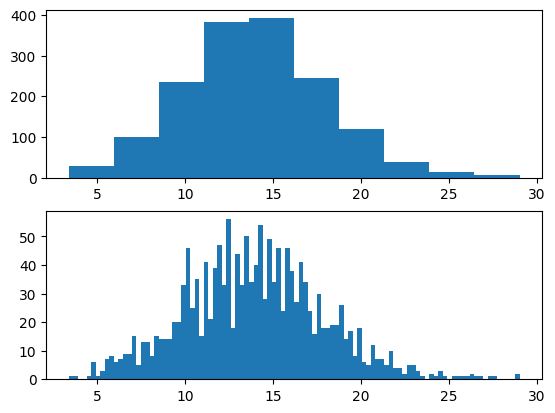

In [ ]:
plt.subplot(2,1,1)
plt.hist(_final_df.College_Points_pergame)
plt.subplot(2,1,2)
plt.hist(_final_df.College_Points_pergame,bins=100);

Text(0.5, 1.0, 'PPG vs VORP')

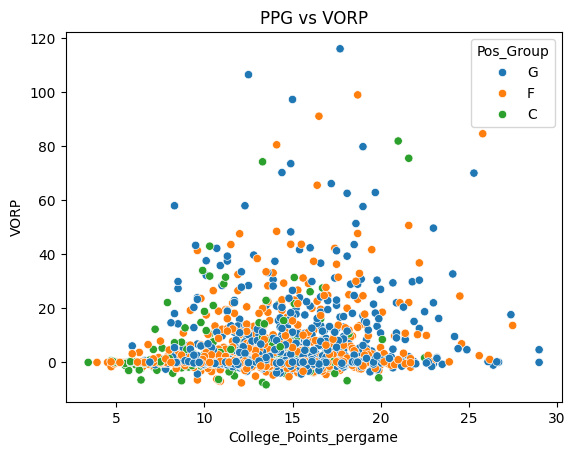

In [ ]:
sns.scatterplot(_final_df,x='College_Points_pergame',y='VORP',hue='Pos_Group')
plt.title('PPG vs VORP')

Text(0.5, 1.0, 'PPG vs WS')

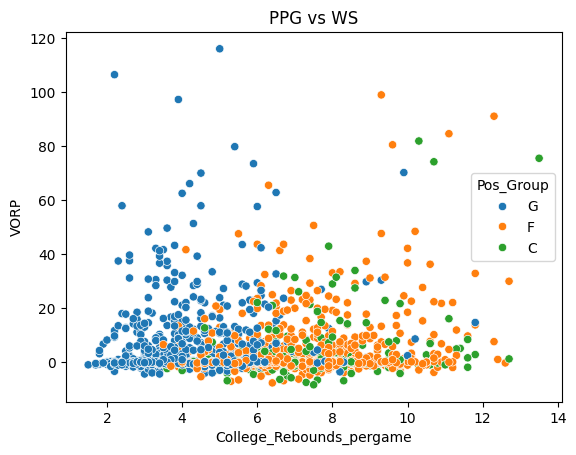

In [ ]:
sns.scatterplot(_final_df,x='College_Rebounds_pergame',y='VORP',hue='Pos_Group')
plt.title('PPG vs WS')

<Axes: xlabel='height', ylabel='Count'>

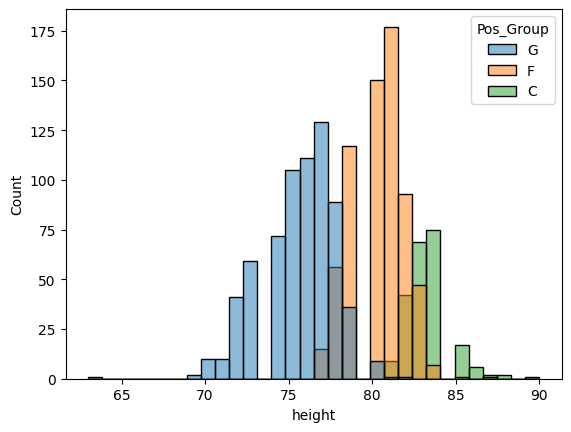

In [ ]:
sns.histplot(_final_df,x='height',hue='Pos_Group')

Text(0.5, 1.0, 'PPG vs WS')

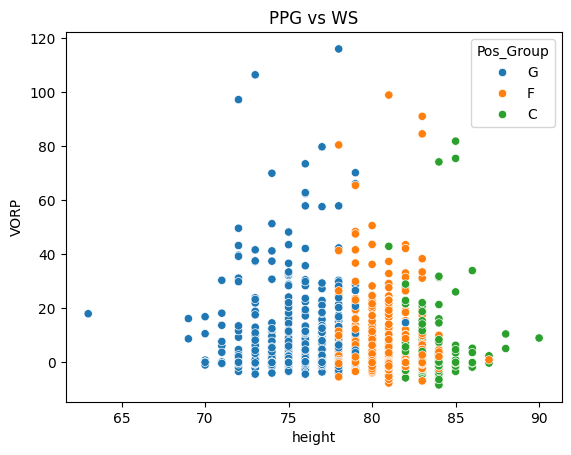

In [ ]:
sns.scatterplot(_final_df,x='height',y='VORP',hue='Pos_Group')
plt.title('PPG vs WS')


<ipython-input-70-f7d3b1180e87>:14: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



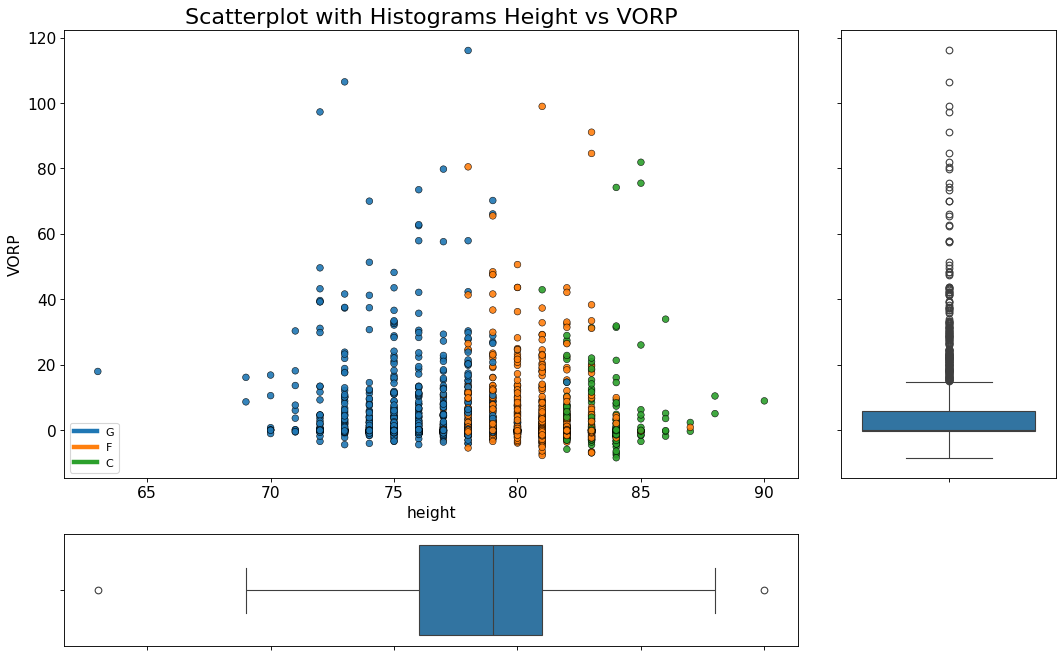

In [ ]:
# Making a graph in order to put in the PowerPoint Presentation
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes and color
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
my_color=np.where(_final_df['Pos_Group']=='G',"#1f77b4",
                  np.where(_final_df['Pos_Group']=='F',"#ff7f0e",
                           np.where(_final_df['Pos_Group']=='C',"#2ca02c","#a05195")))

# Scatterplot on main ax
ax_main.scatter('height', 'VORP', c=my_color, alpha=.9, data=_final_df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(_final_df.VORP, ax=ax_right, orient="v")
sns.boxplot(_final_df.height, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms Height vs VORP', xlabel='height', ylabel='VORP')

custom_lines = [Line2D([0], [0], color="#1f77b4", lw=4),
                Line2D([0], [0], color="#ff7f0e", lw=4),
                Line2D([0], [0], color="#2ca02c", lw=4)]
ax_main.legend(custom_lines, ['G', 'F', 'C'], loc='lower left')



# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

Text(0.5, 1.0, 'PPG vs WS')

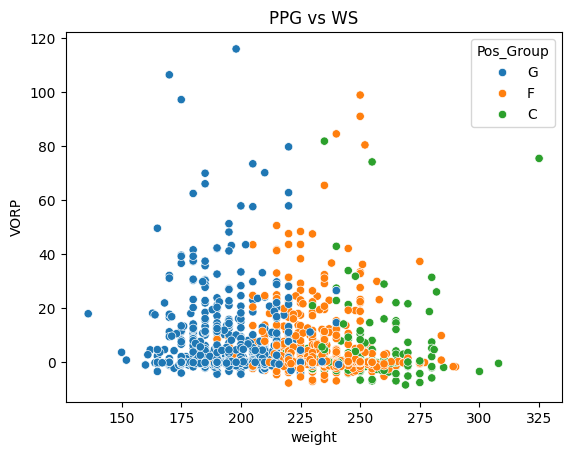

In [ ]:
sns.scatterplot(_final_df,x='weight',y='VORP',hue='Pos_Group')
plt.title('PPG vs WS')

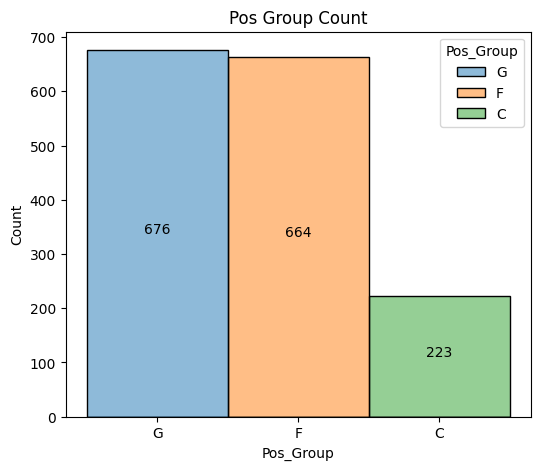

In [ ]:
# plot histogram to put in the PPT
fig = plt.figure(figsize=(6,5))
ax = sns.histplot(_final_df,x='Pos_Group',hue='Pos_Group')
ax.set(title='Pos Group Count')

# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    if height != 0:
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height/2, # y-coordinate position of data label, padded 0.2 above bar
        s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
        ha = 'center') # sets horizontal alignment (ha) to center

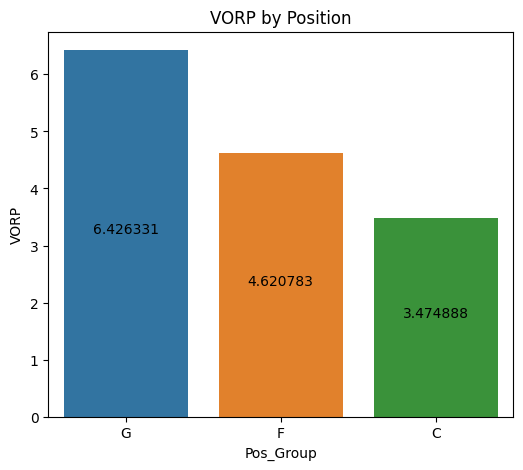

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = sns.barplot(_final_df,x='Pos_Group',y='VORP',hue='Pos_Group',estimator='mean',errorbar=None)
ax.set(title='VORP by Position')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    if height != 0:
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height/2, # y-coordinate position of data label, padded 0.2 above bar
        s = '{:0f}'.format(height), # data label, formatted to ignore decimals
        ha = 'center') # sets horizontal alignment (ha) to center

In [ ]:
top_x = (_final_df['College'].value_counts()).iloc[:25]
top_x_df=top_x.reset_index()
top_x.columns = ['College', 'Count']
pd.set_option('display.max_rows', None)
all=_final_df.groupby('College')['VORP'].mean()
all_df=all.reset_index()
all.sort_values(ascending=False)
top_x_df = top_x_df.merge(all_df, on='College', how='left')
# Making a top 25 list of colleges to make an easier graphic

In [ ]:
vorp_description=_final_df['VORP'].describe()

In [ ]:
vorp_description

count    1563.000000
mean        5.238196
std        12.588906
min        -8.500000
25%        -0.400000
50%         0.000000
75%         5.750000
max       116.100000
Name: VORP, dtype: float64

In [ ]:
vorp_description[4]

-0.4

In [ ]:
vorp=top_x_df["VORP"]
cond_list = [vorp <0 , vorp < 3, vorp < 6, vorp >= 6]
choice_list = ["Low Vorp", "Mid Vorp", "Good Vorp", "Great Vorp"]
# making a tier vorp list based on the description of the vorp above

In [ ]:
top_x_df['VORP Group']=np.select(cond_list, choice_list)

In [ ]:
top_x_df

,College,count,VORP,VORP Group
0,Kentucky,55,5.278182,Good Vorp
1,Duke,47,6.929787,Great Vorp
2,UCLA,46,6.780435,Great Vorp
3,UNC,42,10.521429,Great Vorp
4,Arizona,38,6.302632,Great Vorp
5,Kansas,35,4.828571,Good Vorp
6,Syracuse,31,2.474194,Mid Vorp
7,Louisville,30,2.386667,Mid Vorp
8,Michigan,29,4.168966,Good Vorp
9,UConn,28,8.132143,Great Vorp


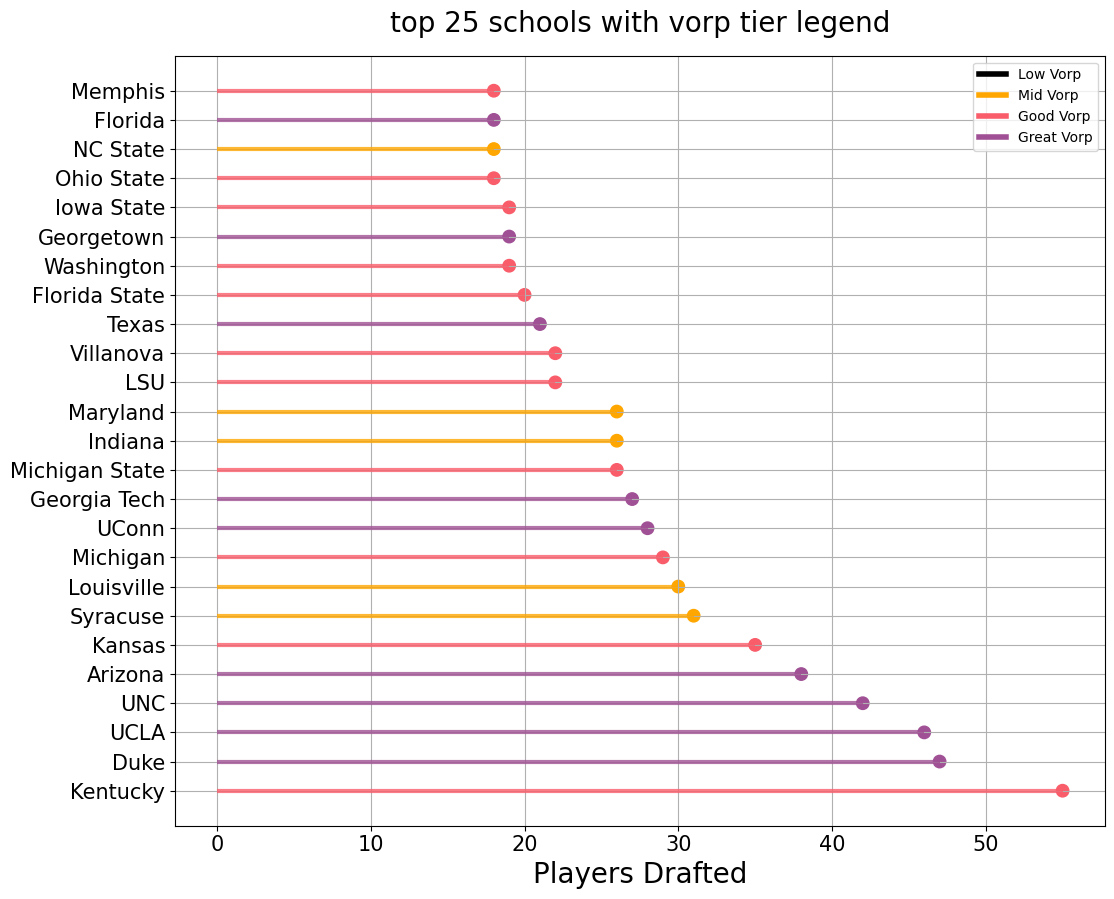

In [ ]:
fig = plt.figure(figsize=(12,10))

list_ordering = ['Low Vorp','Mid Vorp','Good Vorp','Great Vorp']
my_range=range(0,len(top_x_df))
my_color=np.where(top_x_df['VORP Group']=='Low Vorp',"#0",
                  np.where(top_x_df['VORP Group']=='Mid Vorp',"#ffa600",
                           np.where(top_x_df['VORP Group']=='Good Vorp',"#f95d6a","#a05195")))

plt.hlines(y=top_x_df['College'], xmin=0, xmax=top_x_df['count'], color=my_color,linewidth=3, alpha =0.8)
plt.scatter(top_x_df['count'], my_range, color=my_color, s=80, alpha=1)
plt.title("top 25 schools with vorp tier legend", fontsize=20, x=0.5,y=1.02)
plt.xlabel('Players Drafted', fontsize=20)
plt.ylabel('',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid()
custom_lines = [Line2D([0], [0], color="Black", lw=4),
                Line2D([0], [0], color="#ffa600", lw=4),
                Line2D([0], [0], color="#f95d6a", lw=4),
                Line2D([0], [0], color="#a05195", lw=4)]
plt.legend(custom_lines, ['Low Vorp', 'Mid Vorp', 'Good Vorp','Great Vorp'], loc='upper right')
#plb.savefig('Lollipo_Score',dpi=100,bbox_inches='tight')

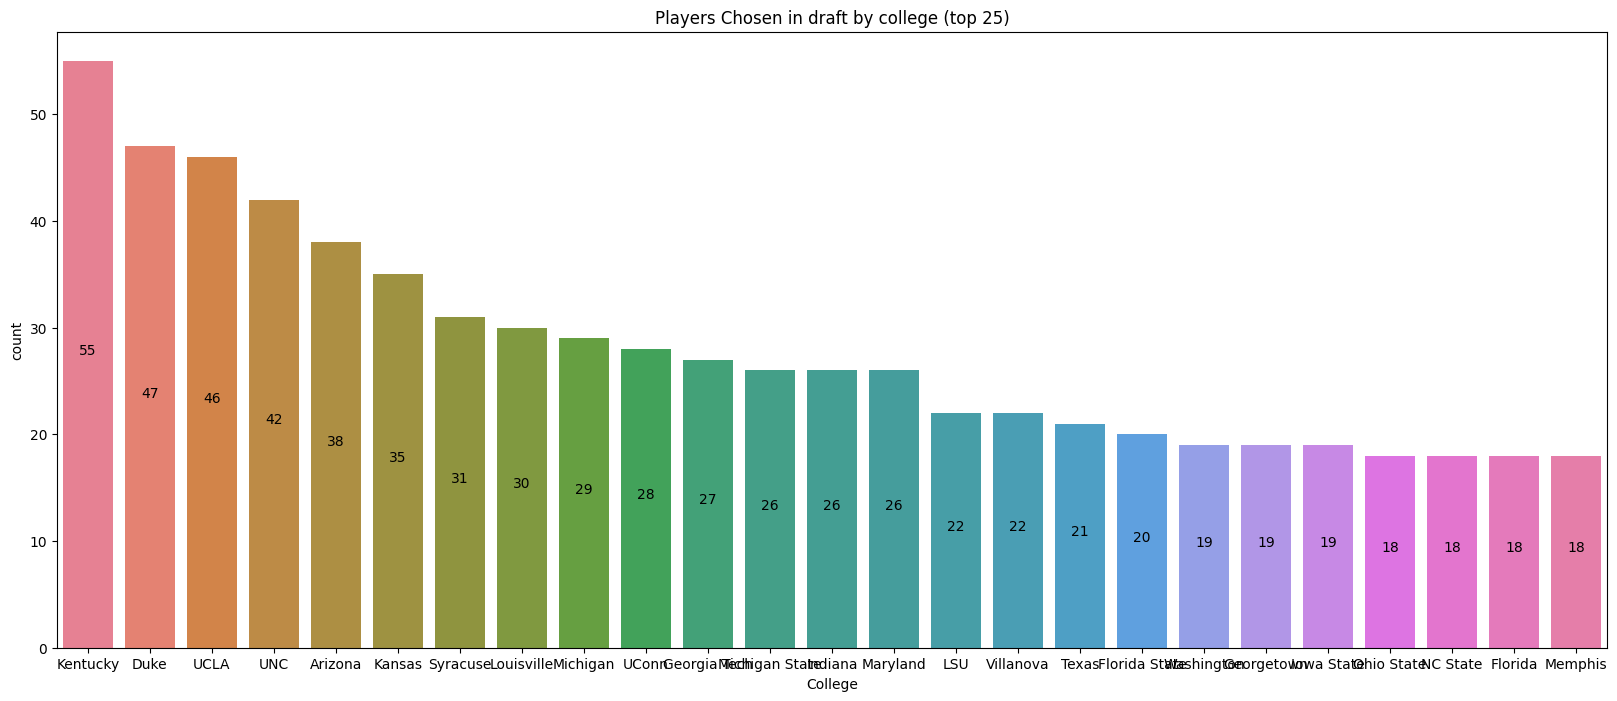

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.barplot(top_x_df,x='College',y='count',hue='College',errorbar=None)
ax.set(title='Players Chosen in draft by college (top 25)')
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    if height != 0:
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height/2, # y-coordinate position of data label, padded 0.2 above bar
        s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
        ha = 'center') # sets horizontal alignment (ha) to center

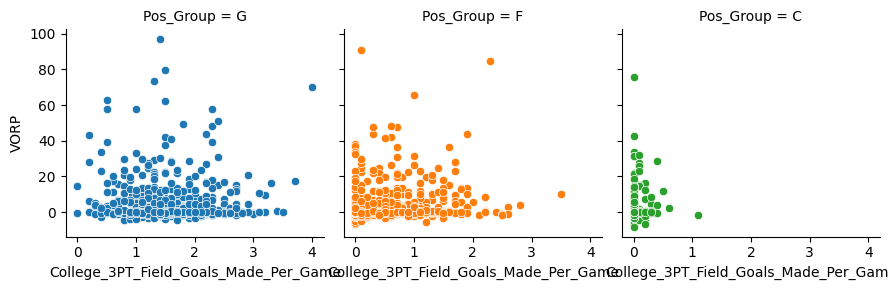

In [ ]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_3PT_Field_Goals_Made_Per_Game", "VORP")

Text(0.5, 1.0, 'PPG vs MPG')

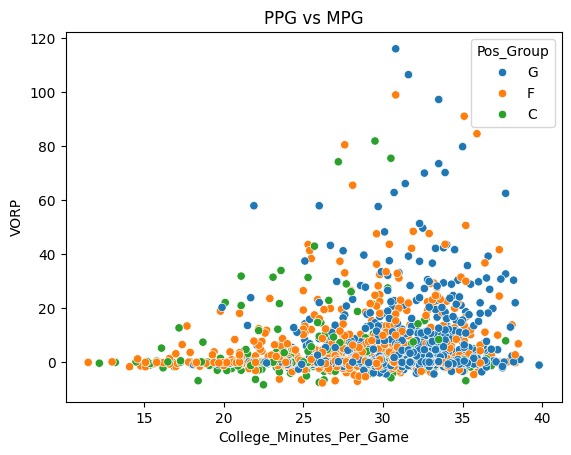

In [ ]:
sns.scatterplot(_final_df,x='College_Minutes_Per_Game',y='VORP',hue='Pos_Group')
plt.title('PPG vs MPG')

In [ ]:
import plotly.express as px
bins = [65, 70, 75, 80, 85, 90,95]
_final_df['binned height'] = pd.cut(_final_df['height'], bins)



In [ ]:
pd.set_option('display.max_rows', 20)
_final_df

,index,Player_x,College_Season,College,College_Games_Played,College_Games_Started,College_Field_Goals_Made_Per_Game,College_Field_Goals_Attempted_Per_Game,College_FG%,College_2PT_Field_Goals_Made_Per_Game,College_2PT_Field_Goals_Attempted_Per_Game,College_Minutes_Per_Game,College_2PT_FG%,College_3PT_Field_Goals_Made_Per_Game,College_3PT_Field_Goals_Attempted_Per_Game,College_3PT_FG%,College_Free_Throws_Made_Per_Game,College_Free_Throws_Attempted_Per_Game,College_FT%,College_Rebounds_pergame,College_Assists_pergame,College_Steals_pergame,College_Blocks_pergame,College_Turnovers_pergame,College_Fouls_pergame,College_Points_pergame,College_strength_of_schedule,Pk,Tm,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,Nba_Minutes_Per_Game,Nba_Pts_Per_Game,Nba_Rebounds_Per_Game,Nba_Ast_Per_Game,WS,WS/48,BPM,VORP,Draft_Year,year_min,year_max,pos,height,weight,birth_date,Pos_Group,binned height
42,57,Mark Aguirre,Career,DePaul,89,NaN,9.7,17.8,0.546,NaN,NaN,37.3,NaN,NaN,NaN,NaN,5.1,6.7,0.768,7.9,3.3,1.5,0.5,3.4,2.8,24.5,3.230000,1,DAL,13.0,923.0,27730.0,27730.0,4578.0,2871.0,0.484,0.312,0.741,30.0,30.0,5.0,3.1,67.8,0.117,1.5,24.4,1981,1982,1994,F-G,78.0,232.0,1959-12-10,F,"(75, 80]"
43,58,Isiah Thomas,Career,Indiana,63,63.0,5.8,10.9,0.534,NaN,NaN,34.5,NaN,NaN,NaN,NaN,3.7,5.0,0.756,3.5,5.7,2.2,0.2,3.9,3.3,15.4,10.450000,2,DET,13.0,979.0,35516.0,35516.0,3478.0,9061.0,0.452,0.290,0.759,36.3,36.3,3.6,9.3,80.7,0.109,2.6,41.6,1981,1982,1994,G,73.0,180.0,1961-04-30,G,"(70, 75]"
44,59,Buck Williams,Career,Maryland,85,84.0,5.2,8.5,0.615,NaN,NaN,33.2,NaN,NaN,NaN,NaN,3.1,4.9,0.623,10.9,0.9,0.9,1.0,2.1,3.0,13.6,7.860000,3,NJN,17.0,1307.0,42464.0,42464.0,13017.0,1646.0,0.549,0.167,0.664,32.5,32.5,10.0,1.3,120.1,0.136,0.0,21.7,1981,1982,1998,F-C,80.0,215.0,1960-03-08,F,"(75, 80]"
45,60,Al Wood,Career,UNC,126,37.0,6.5,11.7,0.560,NaN,NaN,33.1,NaN,NaN,NaN,NaN,2.9,3.8,0.764,5.0,1.4,1.0,0.5,1.8,2.6,16.0,8.050000,4,ATL,6.0,417.0,9939.0,9939.0,1262.0,742.0,0.465,0.211,0.789,23.8,23.8,3.0,1.8,15.4,0.074,-1.3,1.8,1981,1982,1987,G-F,78.0,193.0,1958-06-02,G,"(75, 80]"
46,61,Danny Vranes,Career,Utah,111,110.0,5.8,9.9,0.584,NaN,NaN,31.1,NaN,NaN,NaN,NaN,3.9,5.5,0.703,8.6,1.2,NaN,NaN,1.8,2.9,15.4,3.790000,5,SEA,7.0,510.0,10624.0,10624.0,1998.0,594.0,0.496,0.105,0.570,20.8,20.8,3.9,1.2,15.3,0.069,-1.7,0.8,1981,1982,1988,F,79.0,210.0,1958-10-29,F,"(75, 80]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,1921,Justin Wright-Foreman,Career,Hofstra,125,82.0,6.6,13.6,0.483,4.3,7.8,28.1,0.555,2.2,5.7,0.386,3.3,4.1,0.811,2.9,2.1,0.7,0.2,1.7,1.6,18.6,-1.810000,53,UTA,1.0,4.0,45.0,45.0,5.0,7.0,0.350,0.200,0.750,11.3,11.3,1.3,1.8,0.0,-0.008,-9.0,-0.1,2019,2020,2020,G,72.0,190.0,1997-10-27,G,"(70, 75]"
1607,1922,Marial Shayok,Iowa State,Iowa State,34,34.0,6.7,13.6,0.496,4.6,8.2,32.9,0.568,2.1,5.4,0.386,3.2,3.6,0.878,4.9,2.0,0.9,0.2,2.7,2.1,18.7,5.831015,54,PHI,1.0,4.0,28.0,28.0,7.0,1.0,0.250,0.333,0.750,7.0,7.0,1.8,0.3,-0.1,-0.130,-13.0,-0.1,2019,2020,2020,G,77.0,198.0,1995-07-26,G,"(75, 80]"
1608,1923,Kyle Guy,Career,Virginia,106,78.0,4.4,10.1,0.433,2.0,4.5,29.1,0.444,2.4,5.6,0.425,1.3,1.6,0.806,3.0,1.6,0.7,0.0,1.1,1.1,12.5,10.040000,55,NYK,3.0,53.0,431.0,431.0,53.0,50.0,0.361,0.303,0.750,8.1,8.1,1.0,0.9,0.1,0.006,-4.9,-0.3,2019,2020,2022,G,73.0,167.0,1997-08-11,G,"(70, 75]"
1609,1925,Jordan Bone,Career,Tennessee,95,87.0,3.6,8.4,0.424,2.6,5.7,26.1,0.458,1.0,2.7,0.353,1.6,2.0,0.817,2.4,4.3,0.7,0.1,1.6,1.2,9.7,10.150000,57,NOP,2.0,24.0,249.0,249.0,28.0,26.0,0.378,0.286,NaN,10.4,10.4,1.2,1.1,0.1,0.010,-5.9,-0.2,2019,2020,2021,G,74.0,180.0,1997-11-05,G,"(70, 75]"


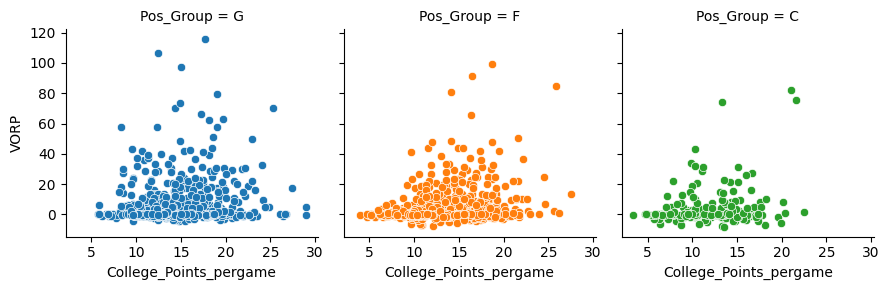

In [ ]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_Points_pergame", "VORP")


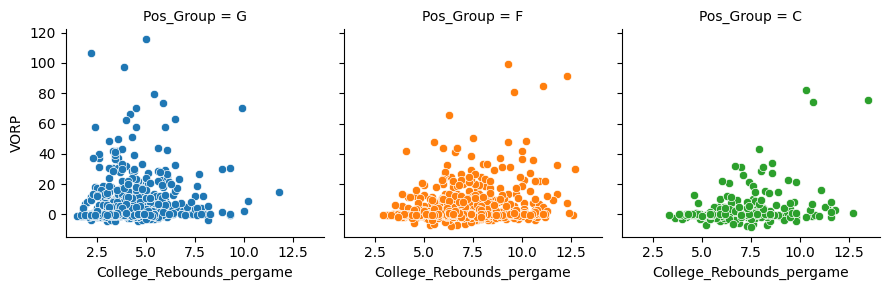

In [ ]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_Rebounds_pergame", "VORP")

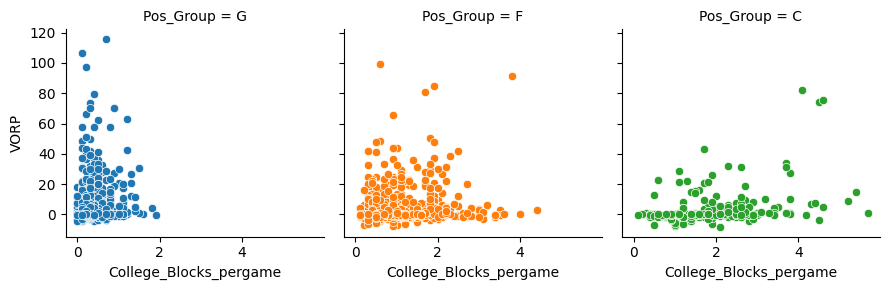

In [ ]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_Blocks_pergame", "VORP",)

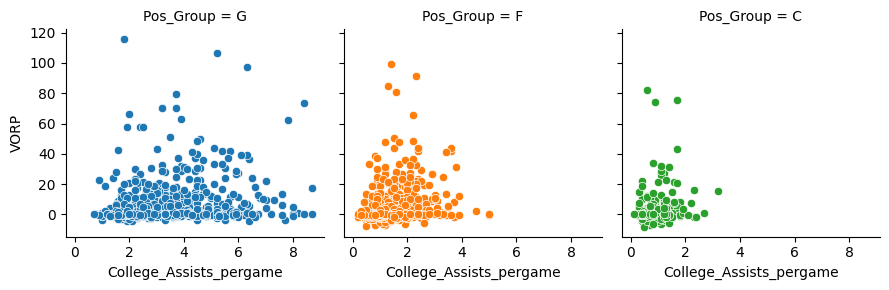

In [ ]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_Assists_pergame", "VORP",)

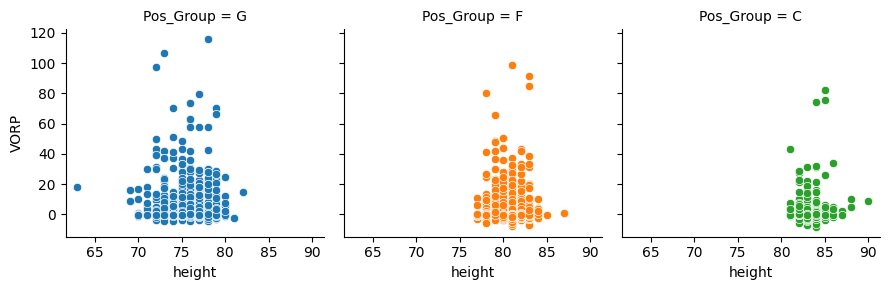

In [ ]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, 'height','VORP')


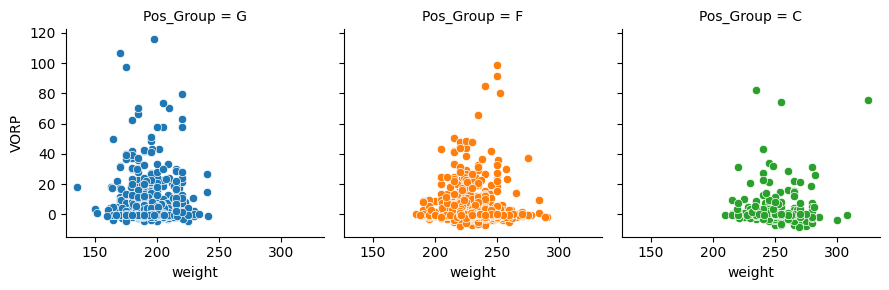

In [ ]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, 'weight','VORP')

Text(0.5, 1.0, 'PPG vs MPG')

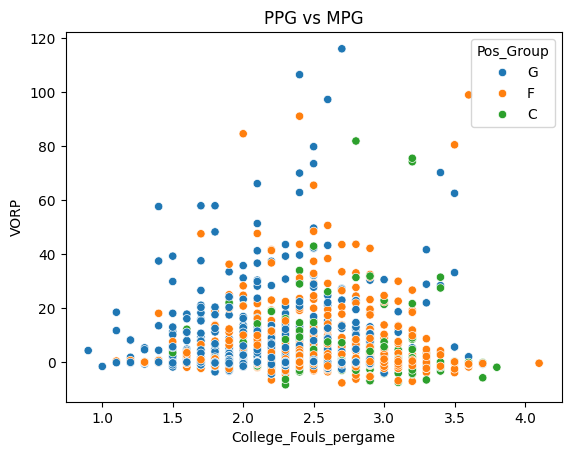

In [ ]:
sns.scatterplot(_final_df,x='College_Fouls_pergame',y='VORP',hue='Pos_Group')
plt.title('PPG vs MPG')

Text(0.5, 1.0, 'PPG vs MPG')

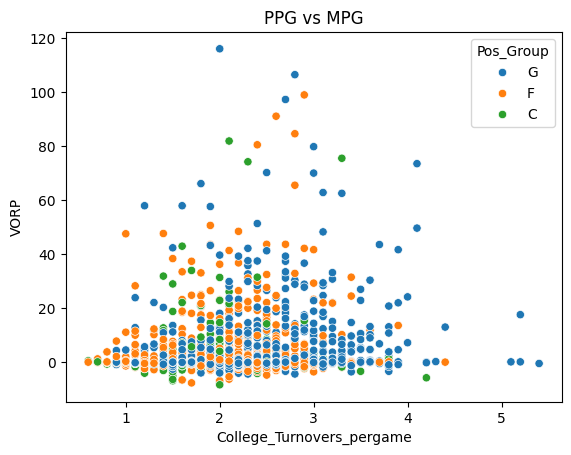

In [ ]:
sns.scatterplot(_final_df,x='College_Turnovers_pergame',y='VORP',hue='Pos_Group')
plt.title('PPG vs MPG')

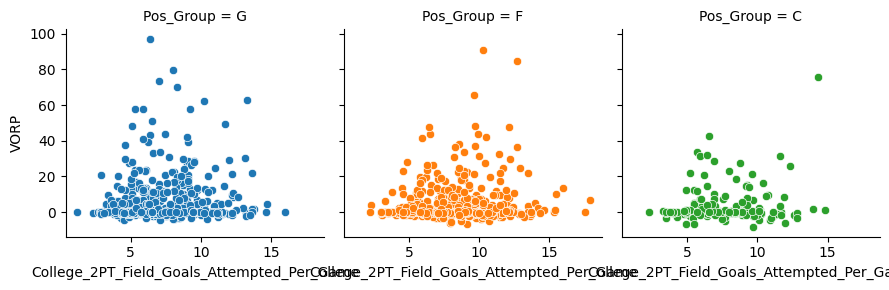

In [ ]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, 'College_2PT_Field_Goals_Attempted_Per_Game','VORP')



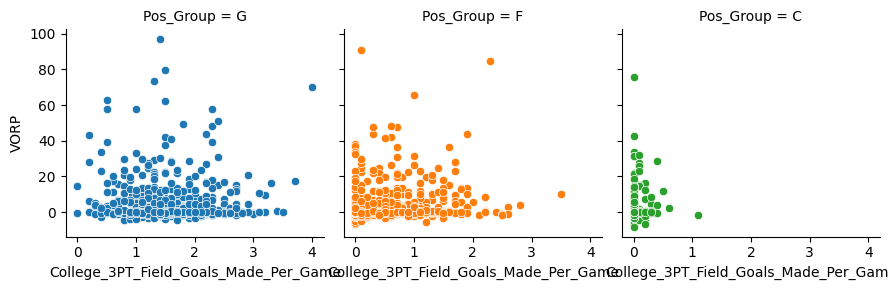

In [ ]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_3PT_Field_Goals_Made_Per_Game", "VORP")

